In [63]:
%load_ext autoreload
%autoreload 2
from src.experiments.training_experiments import run_batched_DOE_with_features
from src.models.sae_model import BatchedSAE_Updated
import pandas as pd
from matplotlib import pyplot as plt

#manual seed torch and numpy
import torch
import numpy as np

seed = 1337
torch.manual_seed(seed)
np.random.seed(seed)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
results = run_batched_DOE_with_features(model_type = BatchedSAE_Updated)

In [65]:
# First, let's flatten the structure
flattened_data = []
for sparsity, value_list in results.items():
    for item in value_list:
        # Create a row by combining the sparsity with the inner dictionary
        row = {'sparsity': sparsity}
        row.update({
            'mse': float(item['mse']), 
            'L0': float(item['L0']),
            'L1 lambda': item['L1 lambda'],
            'weights': item['weights'],
            'biases': item['biases'],
            'features': item['features']
        })
        flattened_data.append(row)

# Create DataFrame
df = pd.DataFrame(flattened_data)

In [66]:
df

,sparsity,mse,L0,L1 lambda,weights,biases,features
0,5,0.012243,15.085274,0.00002,"[[0.06452684, 0.05007965, -0.0012815365, -0.07...","[0.008315723, 0.0051897326, 0.050728735, 0.045...","[[-0.06266938682043928, -0.04369489411120658, ..."
1,5,0.020980,8.617889,0.00003,"[[-0.04873623, -0.07796387, 0.04606512, -0.095...","[0.006713303, 0.0048487047, 0.02912999, 0.0278...","[[-0.06266938682043928, -0.04369489411120658, ..."
2,5,0.028588,6.116632,0.00004,"[[-0.005415283, 0.056024883, 0.019010821, 0.04...","[0.0022621795, 0.0033553303, 0.022552151, 0.02...","[[-0.06266938682043928, -0.04369489411120658, ..."
3,5,0.033748,4.469076,0.00005,"[[-0.018137857, -0.044314638, -0.012618361, -0...","[0.0015916155, -0.0010272001, 0.025551006, 0.0...","[[-0.06266938682043928, -0.04369489411120658, ..."
4,5,0.037838,2.295688,0.00006,"[[-0.04008147, 0.046967193, -0.019093309, 0.04...","[0.0025198893, -5.2820364e-05, 0.025816187, 0....","[[-0.06266938682043928, -0.04369489411120658, ..."
5,10,0.029600,41.281748,0.00002,"[[0.05082531, 0.07992221, -0.006597891, 0.0073...","[0.034161523, -0.12459232, 0.08153211, 0.03185...","[[-0.12488064619168046, -0.12084640547778072, ..."
6,10,0.039050,19.864315,0.00003,"[[-0.006451342, 0.005316244, 0.036394197, 0.00...","[0.029482396, -0.099622965, 0.06813955, 0.0268...","[[-0.12488064619168046, -0.12084640547778072, ..."
7,10,0.050837,12.139904,0.00004,"[[-0.08202444, 0.10943617, -0.07419077, -0.013...","[0.033121042, -0.08007158, 0.06431081, 0.02375...","[[-0.12488064619168046, -0.12084640547778072, ..."
8,10,0.061591,7.962872,0.00005,"[[0.06154382, 0.0254843, -0.11849368, -0.04765...","[0.028861098, -0.06459024, 0.05511176, 0.02112...","[[-0.12488064619168046, -0.12084640547778072, ..."
9,10,0.067904,4.319904,0.00006,"[[-0.010023173, 0.11483953, 0.0811833, -0.0550...","[0.027394388, -0.058046687, 0.049603824, 0.019...","[[-0.12488064619168046, -0.12084640547778072, ..."


Average cosine similarity of matched features: 0.3157


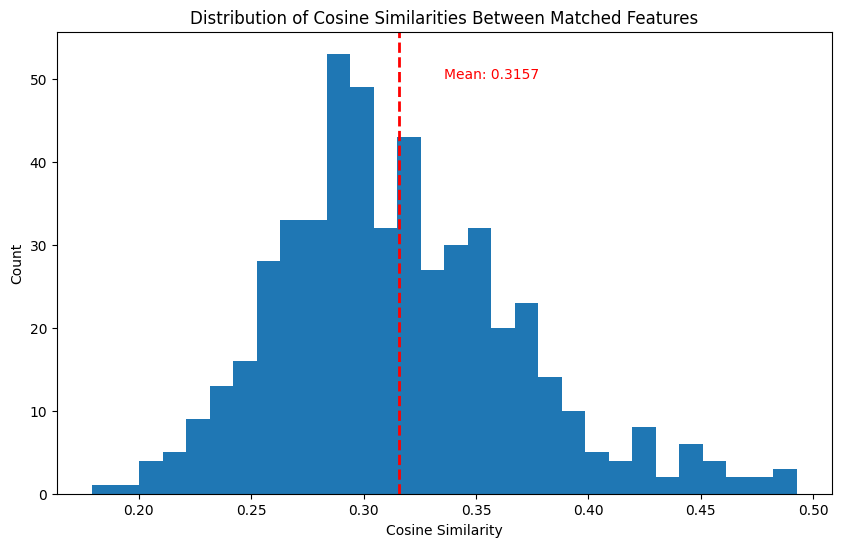

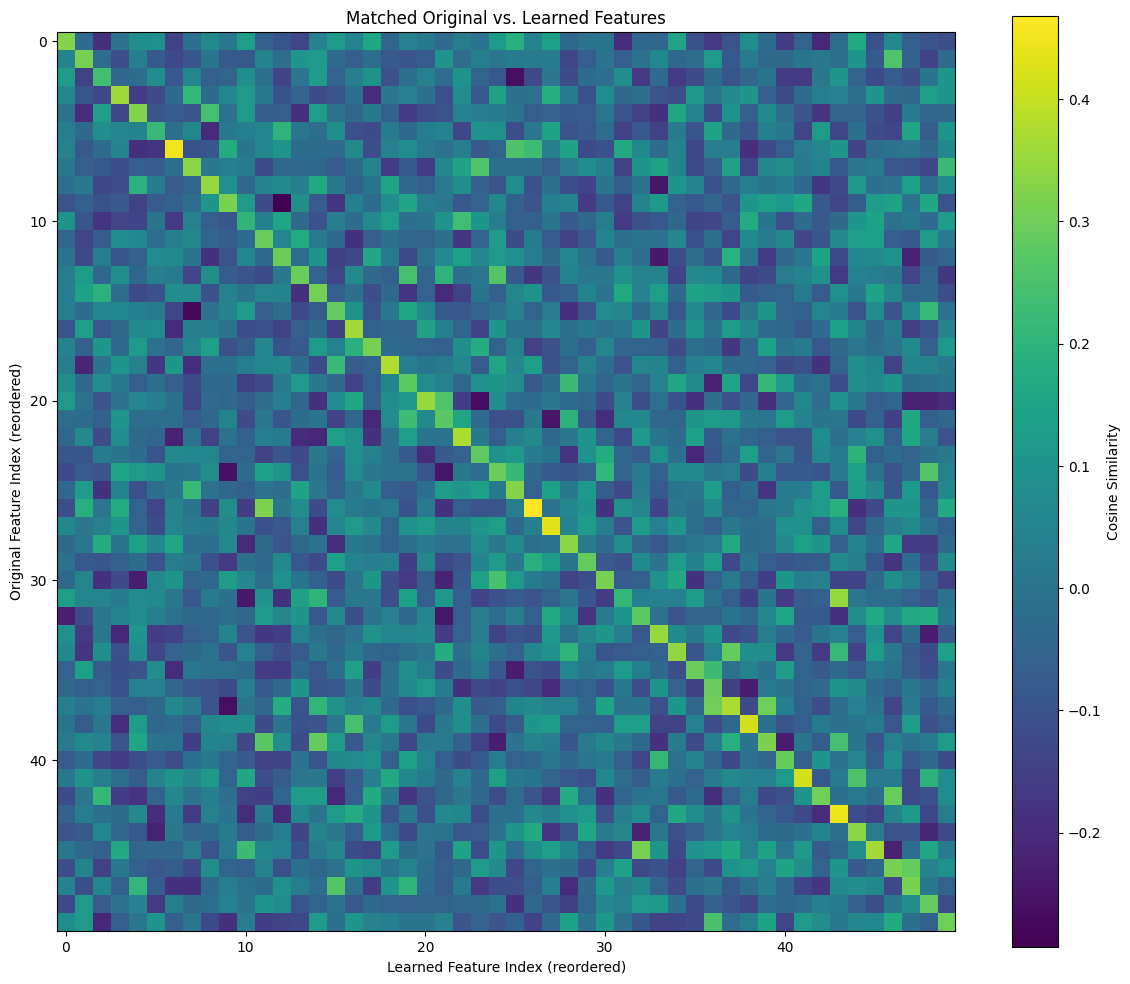

In [76]:
# Starting with:
features = df['features'].iloc[27]  # Original features - shape 512 x 128
weights = df['weights'].iloc[27]    # Learned weights (W_out) - shape 512 x 128

# Compute cosine similarity matrix between original features and learned weights
import numpy as np
from scipy.spatial.distance import cosine

def cosine_similarity(vec1, vec2):
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0
    return np.dot(vec1, vec2) / (norm1 * norm2)

n_features = features.shape[0]  # Should be 512
similarity_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        # Compare original feature i with learned weight row j
        similarity_matrix[i, j] = cosine_similarity(features[i], weights[j])

# Find optimal matching using the Hungarian algorithm
from scipy.optimize import linear_sum_assignment

row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
matches = list(zip(row_ind, col_ind))
match_similarities = [similarity_matrix[i, j] for i, j in matches]
average_similarity = np.mean(match_similarities)

print(f"Average cosine similarity of matched features: {average_similarity:.4f}")

# Visualize the results
import matplotlib.pyplot as plt

# Distribution of similarities
plt.figure(figsize=(10, 6))
plt.hist(match_similarities, bins=30)
plt.title("Distribution of Cosine Similarities Between Matched Features")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.axvline(average_similarity, color='red', linestyle='dashed', linewidth=2)
plt.text(average_similarity+0.02, plt.ylim()[1]*0.9, f'Mean: {average_similarity:.4f}', 
         color='red')
plt.show()

# Visualize the matching with a heatmap of the reordered similarity matrix
plt.figure(figsize=(12, 10))
reordered_matrix = similarity_matrix[row_ind, :][:, col_ind]
plt.imshow(reordered_matrix[:50, :50], cmap='viridis', interpolation='none')
plt.colorbar(label='Cosine Similarity')
plt.title('Matched Original vs. Learned Features')
plt.xlabel('Learned Feature Index (reordered)')
plt.ylabel('Original Feature Index (reordered)')
plt.tight_layout()
plt.show()

In [68]:
vecs = np.ones((2,100))
vec1 = vecs[0,:]
vec2 = vecs[1,:]

vec1[0] = 0

#normalize
vec1 = vec1/np.linalg.norm(vec1)
vec2 = vec2/np.linalg.norm(vec2)

#dot product
dot_product = np.dot(vec1, vec2)

print(dot_product)



0.9949874371066197


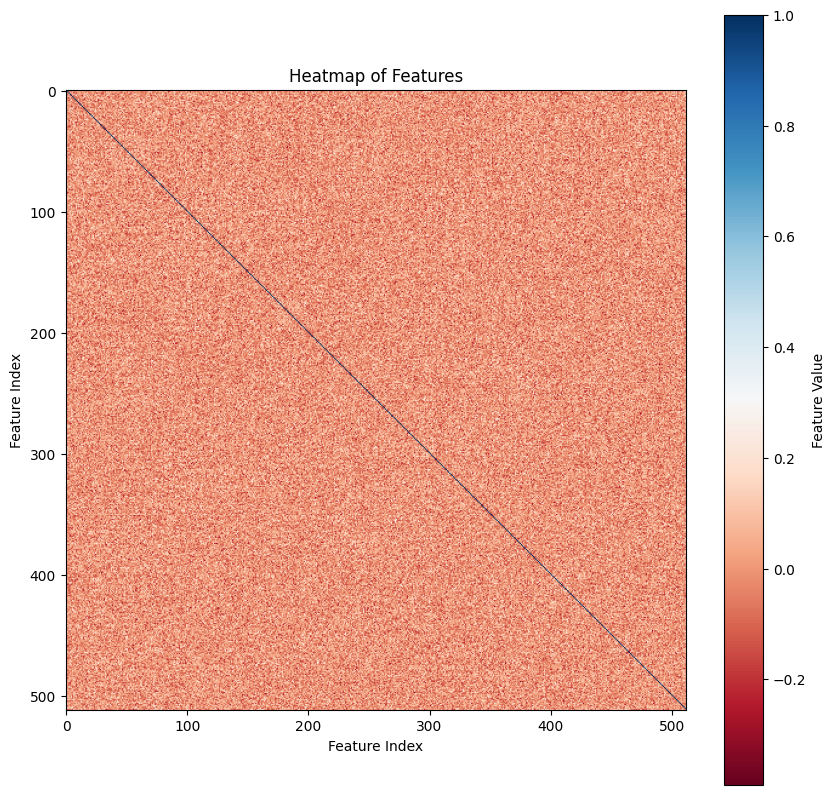

In [69]:
#heatmap of features big plot
plt.figure(figsize=(10, 10))
plt.imshow(features @ features.T, cmap='RdBu')
plt.colorbar(label='Feature Value')
plt.title('Heatmap of Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.show()

In [74]:
#norm of the weight rows
weight_norms = np.linalg.norm(weights, axis=1)
features_norms = np.linalg.norm(features, axis=1)

print(weight_norms)

[0.8193695  0.7439387  0.79556    0.7929115  0.7935979  0.7997378
 0.7710543  0.7684411  0.79869306 0.79883116 0.79698646 0.7861759
 0.7663864  0.8272607  0.7480142  0.7853353  0.7671745  0.7629931
 0.78535897 0.7516919  0.80615973 0.7423424  0.79671013 0.7970309
 0.8138197  0.76802355 0.7596215  0.712468   0.7739193  0.7910361
 0.8089735  0.74825704 0.7719376  0.8146061  0.82638264 0.7757489
 0.7387628  0.7466934  0.6755163  0.7845949  0.7705805  0.8103223
 0.736567   0.78235424 0.7626165  0.79019976 0.7456418  0.81164855
 0.7728854  0.8001723  0.7565245  0.7559525  0.8101202  0.76344556
 0.7838879  0.79164356 0.8100607  0.7520265  0.73831135 0.77450854
 0.79635537 0.8238918  0.7337355  0.72584546 0.8242207  0.7538581
 0.7364303  0.8058741  0.77871543 0.7203866  0.7567398  0.7930752
 0.6425078  0.7463582  0.7498006  0.71930146 0.7689533  0.8191512
 0.7731945  0.80402297 0.7318778  0.75294006 0.7601962  0.7004034
 0.77630126 0.74019015 0.80579144 0.76271975 0.7831457  0.7062114
 0.8090